In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.cluster import KMeans
%matplotlib inline

In [35]:
df_appliances = pd.read_csv('credit_card/appliances_utf8.csv')
df_department = pd.read_csv('credit_card/departmentstore.csv')
df_drug = pd.read_csv('credit_card/drug_utf8.csv')
df_fashion = pd.read_csv('credit_card/fashion.csv')
df_flower = pd.read_csv('credit_card/flowershop.csv')
#df_food = pd.read_csv('credit_card/food.csv')
#df_home = pd.read_csv('credit_card/home_goods.csv')
df_luxury = pd.read_csv('credit_card/luxury.csv')
df_reuse = pd.read_csv('credit_card/reuse.csv')
df_sport = pd.read_csv('credit_card/sport.csv')
df_super = pd.read_csv('credit_card/supermarket_utf8.csv')

In [34]:
df_appliances.head()

,month,アメリカ合衆国,オーストラリア,台湾,中華人民共和国,タイ,香港,大韓民国,シンガポール
0,12-Aug,49171922,26340071,94590771,156240871,60798441,66252524,83092041,27492894
1,12-Sep,55425553,36140241,97834288,84001724,88439712,75978641,87631229,29091741
2,12-Oct,56629758,40049371,103367812,69291641,157488912,78040706,93480094,53054012
3,12-Nov,47490087,41192971,163181941,59520106,116607376,82751224,121145265,63097565
4,12-Dec,63525540,58901488,155653129,92870059,177378524,120890276,122495218,99181071


In [80]:
df_drug = df_drug.dropna()
df_flower['タイ'][10] = df_flower['タイ'].median()

/Users/shionhonda/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
df_appliances['台湾'].values

array([  94590771,   97834288,  103367812,  163181941,  155653129,
        190887224,  295630618,  367051488,  508157906,  573145682,
        495434847,  402260500,  298226471,  390051118,  325691547,
        533125241,  897358412,  794930553,  621988273,  641420173,
        619585040,  534832173,  531404300,  594699233,  501712940,
        554407933,  997238873, 1466322947, 1547160717, 1471211833,
       1785200453, 1768208120, 2465563487, 2375592347, 3339225227,
       3240584260, 2955352420, 2436377055, 2821861700, 2740272370,
       2568158907, 2508766838, 2409342010, 1590571234])

In [82]:
length = len(df_appliances['台湾'].values)

In [83]:
# 1月あたり旅行者
tourlist_dic={}
for year in range(2012,2017):
    with open("tourists_number/FY%d"%year,"r",encoding="utf-8") as f:
        dic = json.load(f)
    for countryData in dic["result"]["changes"]:
        country = countryData["countryName"]
        for i in range(len(countryData["data"])):
            num_qt = countryData["data"][i]
            if num_qt["year"] == year:
                if year == 2012:
                    if num_qt["quarter"] > 2:
                        if num_qt["quarter"] == 3:
                            iteration = 2
                        elif num_qt["quarter"] == 4:
                            iteration = 3
                        num_m = num_qt["value"]/3
                        for i in range(iteration):
                            try:
                                tourlist_dic[country].append(num_m)
                            except:
                                tourlist_dic[country] = [num_m]
                elif year == 2016:
                    if num_qt["quarter"] == 1:
                        num_m = num_qt["value"]/3
                        for i in range(3):
                            try:
                                tourlist_dic[country].append(num_m)
                            except:
                                tourlist_dic[country] = [num_m]
                else:
                    num_m = num_qt["value"]/3
                    for i in range(3):
                        try:
                            tourlist_dic[country].append(num_m)
                        except:
                            tourlist_dic[country] = [num_m]
for k,v in tourlist_dic.items():
    tourlist_dic[k] = np.array(v)


In [84]:
tourlist_dic['台湾']

array([  60282.        ,   60282.        ,   47251.        ,
         47251.        ,   47251.        ,   50771.66666667,
         50771.66666667,   50771.66666667,   75715.33333333,
         75715.33333333,   75715.33333333,   85122.66666667,
         85122.66666667,   85122.66666667,   64330.        ,
         64330.        ,   64330.        ,   79218.66666667,
         79218.66666667,   79218.66666667,  100437.66666667,
        100437.66666667,  100437.66666667,  100593.66666667,
        100593.66666667,  100593.66666667,   87058.33333333,
         87058.33333333,   87058.33333333,  102430.        ,
        102430.        ,  102430.        ,  124405.33333333,
        124405.33333333,  124405.33333333,  118414.33333333,
        118414.33333333,  118414.33333333,  100467.66666667,
        100467.66666667,  100467.66666667,  121293.        ,
        121293.        ,  121293.        ])

In [85]:
c_list = ['アメリカ合衆国', 'オーストラリア', '中華人民共和国', '台湾', '大韓民国', '香港', 'タイ', 'シンガポール']
appliances_sum = np.zeros(length)
department_sum = np.zeros(length)
drug_sum = np.zeros(length)
fashion_sum = np.zeros(length)
flower_sum = np.zeros(length)
luxury_sum = np.zeros(length)
reuse_sum = np.zeros(length)
sport_sum = np.zeros(length)
super_sum = np.zeros(length)
tourist_sum = np.zeros(length)
for c in c_list:
    appliances_sum += df_appliances[c].values
    department_sum += df_department[c].values
    drug_sum += df_drug[c].values
    fashion_sum += df_fashion[c].values
    flower_sum += df_flower[c].values
    luxury_sum += df_luxury[c].values
    reuse_sum += df_reuse[c].values
    sport_sum += df_sport[c].values
    super_sum += df_super[c].values
    tourist_sum += tourlist_dic[c]

In [86]:
appliances_mean = appliances_sum/tourist_sum
department_mean = department_sum/tourist_sum
drug_mean = drug_sum/tourist_sum
fashion_mean = fashion_sum/tourist_sum
flower_mean = flower_sum/tourist_sum
luxury_mean = luxury_sum/tourist_sum
reuse_mean = reuse_sum/tourist_sum
sport_mean = sport_sum/tourist_sum
super_mean = super_sum/tourist_sum

In [93]:
array = np.vstack((appliances_mean, department_mean, drug_mean, fashion_mean, flower_mean, luxury_mean, reuse_mean, sport_mean, super_mean))

In [94]:
pred = KMeans(n_clusters=3).fit_predict(array)

In [97]:
pred

array([0, 1, 2, 0, 2, 2, 2, 2, 2], dtype=int32)

In [98]:
df = pd.DataFrame(array)

In [99]:
df['cluster_id']=pred
df['name'] = ["appliances", "department", "drug", "fashion", "flower", "luxury","reuse", "sport", "super"]

In [100]:
df

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,cluster_id,name
0,1803.580221,1773.403035,2757.316794,2941.804207,3771.065229,3443.448345,4331.064951,5790.959419,6176.603781,5828.720971,...,10895.946156,7394.899666,11357.162997,10521.586709,9928.049548,8225.999438,7828.513584,23444.825680,0,appliances
1,16908.153582,16356.715680,26370.613833,26140.610282,32545.394091,29124.415555,31092.866059,34125.709976,38472.620376,33811.072199,...,28672.176459,25031.702239,37304.752691,35820.774768,42260.177011,35209.689451,31211.893106,28304.077497,1,department
2,1149.817042,1141.929380,1612.171182,1562.428229,1819.331021,1585.160750,1692.762109,2092.106681,2237.851569,1841.659756,...,2177.289045,2074.461754,2910.881984,2606.369319,2932.860356,2530.052027,2444.452399,2351.358774,2,drug
3,12107.584992,7160.126217,12460.631738,12062.949044,16316.574226,11448.818655,14454.515439,15983.938748,20465.478616,14891.490629,...,11136.236307,11624.709161,17354.600826,17824.968128,18961.589788,15393.605844,13654.466815,12202.012661,0,fashion
4,20.430160,21.507851,29.600652,24.025156,52.459392,40.096105,26.258065,45.637623,27.234949,69.585079,...,11.715585,11.699106,19.578713,13.875164,22.309462,10.641928,14.013338,11.816429,2,flower
5,1917.451778,1725.678446,2233.238215,2614.801719,3999.170539,3784.619852,4537.547564,5038.469353,8546.422523,5620.905046,...,3663.405571,3392.146166,5302.997499,4514.992755,6143.313426,3825.536246,3219.786548,2734.953488,2,luxury
6,4.498516,6.813479,2.050151,6.778361,7.530314,5.210417,6.345241,11.120561,62.811959,24.760312,...,103.482402,90.558096,239.639509,145.883676,364.775707,182.417660,300.834121,143.458267,2,reuse
7,615.148068,548.549440,882.834439,1071.614041,1188.153091,1039.940210,1167.906293,1316.581767,1345.083664,1298.302226,...,1103.601232,1020.708016,1502.867691,1489.441079,1791.611912,1415.539612,1638.629732,1290.041291,2,sport
8,785.796540,815.740000,1121.376757,1127.028377,1412.338030,1149.803461,1165.913048,1306.302846,1214.052581,1114.957806,...,1037.520175,991.228100,1309.100529,1313.898252,1454.623990,1242.294206,1037.455929,836.274816,2,super


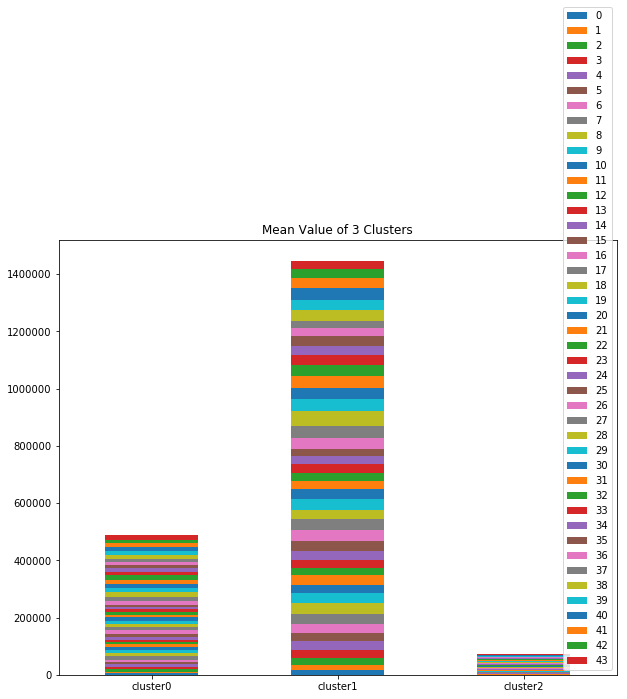

In [107]:
clusterinfo = pd.DataFrame()
for i in range(3):
    clusterinfo['cluster' + str(i)] = df[df['cluster_id'] == i].mean()
clusterinfo = clusterinfo.drop('cluster_id')
 
my_plot = clusterinfo.T.plot(kind='bar', stacked=True, title="Mean Value of 3 Clusters", figsize=(10,8))
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)